# 시작하기 전에

---

현재까지 학습한 내용으로는 다항 회귀를 통해서 어느 정도 예측이 가능하지만, 다항회귀의 마지막에서 과소적합의 가능성이 있는 상태였기 때문에 길이를 통해서 무게를 예측하는 과정에서는 더 고차항으로 가는 방법 뿐이기 때문에 다른 특성을 같이 학습하는 다중회귀에 대해서 알아보려 한다.

# 다중 회귀

---

하나의 특성을 이용한 선형 회귀에서 여러 개의 특성을 사용한 선형 회귀를 다중 회귀(multiple regression)이라 부른다.

선형 회귀의 경우 1개의 특성을 사용했을 때 선형 회귀 모델이 학습하는 것은 직선(또는 다항식을 이용한 곡선)이다.



## 선형 회귀

---


만일 2개의 특성을 사용한다면 무엇을 학습할까? 일반적인 선형 회귀는 다음과 같다.

$$target = a * feature1 +b$$
전형적인 2변수 함수로 이때 선형 회귀는 2차원 공간에 선을 나타낸다.

## 다중 회귀
---

2개의 특성을 사용하는 다중회귀의 경우에는
$$target = a * feature1 + b * feature2 + c$$
와 같은 3변수 함수로 이때 다중 회귀는 3차원 공간에 평면을 나타낸다.

## 특성 공학(feature engineering)

---

우리는 3차원 공간 이상을 그리거나 상상할 수 없기 때문에 특성이 3개인 경우를 상상할 수 없다.

분명한 것은 선형 회귀를 단순한 직선이나 평면으로 생각하여 성능이 낮다고 생각해서는 안되고, 특성이 많은 고차원에서는 선형 회귀가 매우 복잡한 모델을 표현 가능하다.

이번 절에서는 길이 뿐만 아니라 높이와 두께도 같이 사용하면서 다항식으로도 나타낸다.
그렇게 되면 길이, 높이, 두께로 3개의 특성을 가지게 되는것인데 이를 길이 * 높이를 새로운 특성으로 나타냄으로서 기존의 특성을 사용해서 새로운 특성을 뽑아내는 작업을 특성공학(feature engineering)이라 부른다.

# 데이터 준비

---

전과는 달리 3개의 특성을 사용하기 떄문에 데이터를 복사해 붙혀넣는것 역시 번거롭다.

이를 pandas를 통해서 해결하는데,pandas의 데이터프레임을 사용하면 다차원 배열을 쉽게 확인하고 인터넷을 통해서 데이터를 다운받아 데이터 프레임에 저장이 가능하다.

순서는 데이터가 콤마(,)로 구분된 CSV파일을 pandas 를 통해서 내려받고 데이터 프레임에 저장하고 이를 numpy배열로 변환하여 학습을 진행할 예정

In [1]:
import pandas as pd
import numpy as np

# 데이터 불러오기
df = pd.read_csv("https://bit.ly/perch_csv_data")

# dataframe을 numpy array로 변환
perch_full = df.to_numpy()

perch_full



array([[ 8.4 ,  2.11,  1.41],
       [13.7 ,  3.53,  2.  ],
       [15.  ,  3.82,  2.43],
       [16.2 ,  4.59,  2.63],
       [17.4 ,  4.59,  2.94],
       [18.  ,  5.22,  3.32],
       [18.7 ,  5.2 ,  3.12],
       [19.  ,  5.64,  3.05],
       [19.6 ,  5.14,  3.04],
       [20.  ,  5.08,  2.77],
       [21.  ,  5.69,  3.56],
       [21.  ,  5.92,  3.31],
       [21.  ,  5.69,  3.67],
       [21.3 ,  6.38,  3.53],
       [22.  ,  6.11,  3.41],
       [22.  ,  5.64,  3.52],
       [22.  ,  6.11,  3.52],
       [22.  ,  5.88,  3.52],
       [22.  ,  5.52,  4.  ],
       [22.5 ,  5.86,  3.62],
       [22.5 ,  6.79,  3.62],
       [22.7 ,  5.95,  3.63],
       [23.  ,  5.22,  3.63],
       [23.5 ,  6.28,  3.72],
       [24.  ,  7.29,  3.72],
       [24.  ,  6.38,  3.82],
       [24.6 ,  6.73,  4.17],
       [25.  ,  6.44,  3.68],
       [25.6 ,  6.56,  4.24],
       [26.5 ,  7.17,  4.14],
       [27.3 ,  8.32,  5.14],
       [27.5 ,  7.17,  4.34],
       [27.5 ,  7.05,  4.34],
       [27

target데이터와 나누기는 전과 같이 진행한다.

In [2]:
import numpy as np
from sklearn.model_selection import train_test_split
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

train_input, test_input, train_target, test_target = train_test_split(perch_full, perch_weight, random_state = 42)

train_input.shape

(42, 3)

#사이킷런의 변환기(transformer)
---
사이킷런은 특성을 만들거나 전처리하기 위한 다양한 클래스를 제공하는데 이런 클래스를 변환기(transformer)라 부른다. 사이킷런의 모델 클래스에 일관된 fit, score, predict 메서드가 있는 것처럼 변환기 클래스는 모두 fit, transform 메서드를 제공한다.

앞서 학습했던 LinearRegression같은 사이킷런의 모델 클래스는 추정기(estimator) 라고도 부른다.


이번 학습에 사용할 변환기는 sklearn.preprocessing 패키지의 PolynomialFeatures 클래스이고 순서는 fit 이후에 transform을 메서들르 차례대로 호출한다.

In [3]:
from sklearn.preprocessing import PolynomialFeatures

# 2개의 특성2, 3으로 이루어진 샘플 하나를 적용함
poly = PolynomialFeatures()

poly.fit([[2, 3]])

print(poly.transform([[2, 3]]))


[[1. 2. 3. 4. 6. 9.]]


fit() method는 새롭게 만들 특성 조합을 찾고 transform() 메서드는 실제로 데이터를 변환한다.

위 과정을 하나로 붙힌 fit_transform역시 존재한다.

fit() 메서드 호출을 보면 추정기 때와 다르게 훈련타겟이 필요하지 않다. 따라서 모델 클래스와는 다르게 fit() 메서드에 입력 데이터만 전달하였고 여기에서는 2개의 특성(원소)를 가진 샘플 [2, 3]이 6개의 특성을 가진 샘플 [1. 2. 3. 4. 6. 9]로 바뀌었다.

## PolynomialFeatures

---

PolynomialFeatures 클래스는 기본적으로 각 특성을 제곱한 항을 추가하고 특성끼리 곱한 항을 추가한다. 따라서 위와 같은 2, 3 각각의 제곱 4, 9가 추가 되었고, 2와 3의 곱인 6이 추가되었다.

1의 경우에는 다음의 식을 통해서 알아볼 수 있다.
$$ weight = a * length + b * height + c + thickness + d * 1$$
식에서 마지막 절편에도 1이 곱해지는데 때문에 PolynomialFeatures 클래스에서 transform()을 사용하면 1이 추가된다.

하지만 사이킷런의 선형 모델은 자동으로 절편을 추가하기 떄문에 굳이 1이 추가될 필요가 없어서 include_bias = False로 지정하여 절편항을 없앤다.

include_bias = False를 하지 않아도 사이킷런 모델은 자동으로 특성에 추가된 절편항을 무시하지만, 여기에서는 혼든을 피하기 위해서 명시적으로 지정한다.

In [4]:
#절편을 위한 항 제거
poly = PolynomialFeatures(include_bias = False)
poly.fit([[2, 3]])
poly.transform([[2, 3]])

array([[2., 3., 4., 6., 9.]])

## features transform적용

In [5]:
poly = PolynomialFeatures(include_bias = False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
train_poly.shape

(42, 9)

PolynomialFeatures는 9개의 특성이 어떻게 만들어졌는지 확인하는 아주 좋은 방법을 제공한다. get_feature_names_out() method를 호출하면 9개의 ㅌ특성이 각각 어떤 입력의 조합으로 만들어 졌는디 알려준다.

In [6]:
poly.get_feature_names_out()

array(['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2',
       'x2^2'], dtype=object)

In [7]:
test_poly = poly.transform(test_input)

test_poly.shape

(14, 9)

훈련세트와 테스트세트는 같은 특성을 가지고 있기 때문에 훈련세트를 기준으로 테스트 세트를 변환하였다.

# 다중 회귀 모델 훈련하기

---

다중 회귀 모델을 훈련하는 것은 선형 회귀 모델을 훈련하는 것과 다른게 없다. 다만 여러 개의 특성을 사용하여 선형 회귀를 수형하는 것 뿐이다.

In [8]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(train_poly, train_target)


print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))


0.9903183436982125
0.9714559911594111


길이 뿐만 아니라 높이와 두께를 모두 상요했고 각 특성을 제곱하거나 서로 곱해서 다항 특성을 더 추가하여서 특성이 늘어나면 선형 회귀의 능력은 매우 강력하다는 것을 알 수 있었다.

또한 테스트 세트에 대한 점수는 높아지지 않았자민 과소적합 문제는 해결한것으로 보인다.

## 다중 회귀 고차항

---

3제곱, 4제곱항을 추가하는데 PolynomialFeatures 클래스의 degree 매개변수를 사용하여 필요한 고차항의 최대 차수를 지정할 수 있다.



In [9]:
poly = PolynomialFeatures(degree = 5, include_bias = False)

poly.fit(train_input)

train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)

test_poly.shape
print(poly.get_feature_names_out())

['x0' 'x1' 'x2' 'x0^2' 'x0 x1' 'x0 x2' 'x1^2' 'x1 x2' 'x2^2' 'x0^3'
 'x0^2 x1' 'x0^2 x2' 'x0 x1^2' 'x0 x1 x2' 'x0 x2^2' 'x1^3' 'x1^2 x2'
 'x1 x2^2' 'x2^3' 'x0^4' 'x0^3 x1' 'x0^3 x2' 'x0^2 x1^2' 'x0^2 x1 x2'
 'x0^2 x2^2' 'x0 x1^3' 'x0 x1^2 x2' 'x0 x1 x2^2' 'x0 x2^3' 'x1^4'
 'x1^3 x2' 'x1^2 x2^2' 'x1 x2^3' 'x2^4' 'x0^5' 'x0^4 x1' 'x0^4 x2'
 'x0^3 x1^2' 'x0^3 x1 x2' 'x0^3 x2^2' 'x0^2 x1^3' 'x0^2 x1^2 x2'
 'x0^2 x1 x2^2' 'x0^2 x2^3' 'x0 x1^4' 'x0 x1^3 x2' 'x0 x1^2 x2^2'
 'x0 x1 x2^3' 'x0 x2^4' 'x1^5' 'x1^4 x2' 'x1^3 x2^2' 'x1^2 x2^3' 'x1 x2^4'
 'x2^5']


각 특성의 5제곱까지와 곱들이 합쳐져서 무려 55개의 특성을 가지는데 이를 통해 학습을 진행해보자

In [10]:
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))


0.9999999999996433
-144.40579436844948


55개의 특성으로 train_poly에 대한 train_target값을 학습한 결과 train값의 점수는 매우 높은 반면 test세트의 점수는 매우 낮은데, 이는 과대적합이 일어나서 그렇다.

현재 train_set의 개수는 42개인데 특성의 갯수는 55개에 달한다. 42개의 데이터를 55개의 특성으로 학습한다면, 완벽하게 학습할 수 있는 것이 당연하다.

#규제(regularization)

---

규제는 머신러닝 모델이 훈련 세트를 너무 과도하게 학습하지 못하도록 훼방하는 것을 말한다. 모델이 훈련 세트에 과대적합 되지 않도록 만드는 것이다. 선형 회귀 모델의 경우 특성에 곱해지는 계수(또는 기울기)의 크기를 작게 만드는 것이다.

다중 회귀 모델이 훈련 데이터 하나마다 계속해서 변하는 다항식을 선형으로 만든다면 주변에 있는 테스트 데이터에 대한 보편적인 해석이 어려워 진다.

앞서 스케일의 크기를 맞추지 않으면 거리에 대한 오류가 발생했기 떄문에 스케일이 정규화되지 않으면 여기에 곱해지는 계숙 값도 차이가 난다. 일반적으로 선형 회귀 모델에 규제를 적용할 때 계숙 값의 크기가 서로 많이 다르면 공정하게 제어되지 않을 것 이다.

앞서 스케일을 정규화했을 때는 표준점수를 이용하였다.

각 특성 값이 평균에서 표준편차의 몇 배 만큼 떨어져 있는 지를 알아 내는 과정이였는데

데이터에서 평균을 뺀 값을 모두 제곱한 다음 평균을 내어서 구했다.

---

mean = numpy.mean(data, axis = 0)
std = numpy.std(data, axis = 0)

---

정규화 된 데이터

scaled_data = (data - mean) / std

##StandardScaler

---

이번 학습에서는 사이킷런에서 제공하는 StandardScaler클래스를 사용한다.

In [11]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

ss.fit(train_poly)

train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

#릿지(ridge), 라쏘(lasso)

---

선형 회귀 모델어 규제를 추가한 모델을 릿지(ridge)와 라쏘(lasso)라 부르는데 두 모델은 규제를 가하는 방식이 다르다.

릿지는 계수를 제곱한 값을 기준으로 규제를 적용하고

라쏘는 계소의 절대값을 기준으로 규제를 적용한다.

일박적으로 릿지를 조금 더 선호한다.

두 알고리즘 모두 계수의 크기를 줄이지만 라쏘는 아예 0으로 마들 수도 있다. 물론 사이킷런이 이 두 알고리즘을 모두 제공한다.

#릿지 회귀(ridge regression)

---

릿지와 라쏘 모두 sklearn.linear_model 패키기 안에 포함되어 있다. 사이킷런 모델을 사용할 때 편리한 점은 훈련하고 사용하는 방법이 항상 같다는 것이다.

모델 객체를 만들고 fit() 메서드에서 훈련한 다음 score() 메서드로 평가한다. 앞서 준비한 train_scaled 데이터로 릿지 모델을 훈련해보자

In [12]:
from sklearn.linear_model import Ridge

ridge = Ridge()

ridge.fit(train_scaled, train_target)

print(ridge.score(train_scaled, train_target), ridge.score(test_scaled, test_target))


0.9896101671037343 0.9790693977615387


규제를 통해서 55개의 특성을 넣은 말도 안되는 테스트 세트의 점수가 다소 낮아지고 과대적합 문제 역시 해결된 것을 볼 수 있다.

릿지와 라쏘 모델을 사용할 때 규제의 양을 임의로 조절할 수 있다.

모델 객체를 만들 때 alpha 매개변수로 규제의 강도를 조절한다.

alpha 값이 크면 규제 강도가 세지므로 계수 값을 더 줄이고 조금 더 과소적합되도록 유도한다.

alpha 값이 작으면 계수를 줄이는 역할이 줄어들고 선형 회귀 모델과 유사해지므로 과대적합 될 가능성이 있다.

## alpha값에 대해서

---

alpha 값은 릿지 모델이 학습하는 값이 아니라 사전에 지정해줘야 하는 값이다. 이렇게 머신러닝 모델이 학습할 수 없고 사람이 알려줘야 하는 파라미터를 하이퍼 파라미터(Hyper parameter)라 부른다.

사이킷런과 같은 머신러닝 라이브러리에서 하이퍼파라미터는 클래스와 메서드의 매개변수로 표현된다.

이 머신러닝 학습에서는 함수와 클래스의 파라미터는 **매개변수**라고 하고 모델과 관련된 파라미터(모델 파라미터, 하이퍼 파라미터)는 그대로 **파라미터**라 표현하였다.

## 적절한 alpha값 찾기

---

적절한 alpha 값을 찾는 한 가지 방법은 alpha값에 대한 표준점수의 제곱 값을 그려 보는 것이다.

훈련 세트와 테스트 세트의 점수가 가장 가까움 지점이 최적의 alpha값이 된다.

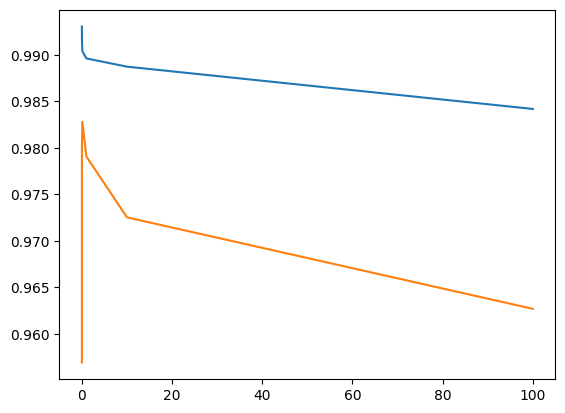

In [13]:
from sklearn.linear_model import Ridge
import matplotlib.pyplot as plt



#alpha값을 바꿀 때 마다 score()메서드의 결과를 저장할 리스트 만들기

train_score = []
test_score = []

alpha = [0.001, 0.01, 0.1, 1, 10, 100]

for i in alpha:
  # 릿지 모델 만들기
  ridge = Ridge(alpha = i)

  # 릿지 모델 훈련하기

  ridge.fit(train_scaled, train_target)

  # 훈련 점수와 테스트 점수 저장하기

  train_score.append(ridge.score(train_scaled, train_target))
  test_score.append(ridge.score(test_scaled, test_target))

# 시각화
plt.plot(alpha, train_score)
plt.plot(alpha, test_score)

plt.show()

## 시각화

---

시각화를 할 때 주의해야할 점은 현재 alpha에 대한 값이 0.001부터 시작이기 때문에

기준을 x의 기준을 log로 잡아주어야 한다. 그렇지 않으면 위와 같이 0부터 1사이에 0.001, 0.01, 0.1, 1의 같이 나타나기 때문에 차이를 제대로 확인하지 못하기 떄문이다.

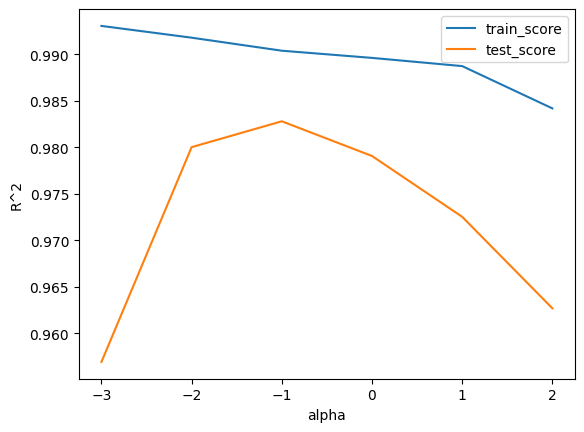

In [19]:
plt.plot(np.log10(alpha), train_score, label = 'train_score')
plt.plot(np.log10(alpha), test_score, label = 'test_score')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.legend()
plt.show()

위 그래프에서 알 수 있는 사실은 규제를 나타내는 alpha의 값이 낮아질 수록 테스트 세트의 점수가 비정상적으로 낮아져서 과대적합이 되고,

alpha값이 높아질 수록 훈련세트와 테스트세트의 점수가 둘 다 낮아져서 과소적합이 되는 것을 볼 수 있다.

따라서 적절한 alpha값은 두 그래프가 가장 가깝고 테스트 세트의 점수와 훈련 세트의 점수 차가 가장 낮을때인데 이는
$$log_{10}(1) = 10^{-1} = 0.1$$
이기 때문에 alpha값이 0.1일 때 가장 적합한 alpha값이다.

## 적합한 alpha값 적용하기

In [20]:
ridge = Ridge(alpha = 0.1)

ridge.fit(train_scaled, train_target)
(ridge.score(train_scaled, train_target), ridge.score(test_scaled, test_target))

(0.9903815817570367, 0.9827976465386928)

#라쏘 회귀(lasso regression)

---

라쏘 모델을 훈련하는 것은 릿지와 매우 비슷하다 Ridge 클래스를 Lasso 클래스로 바꾸는 것이 전부이다.

In [21]:
from sklearn.linear_model import Lasso

lasso = Lasso()

lasso.fit(train_scaled, train_target)

print(lasso.score(train_scaled, train_target), lasso.score(test_scaled, test_target))



0.989789897208096 0.9800593698421883


라쏘 역시 과대적합 / 과소적합을 잘 억제한 결과를 보여준다.

## 적절한 alpha값 찾기

---

라쏘 역시 alpha값을 조절하면서 최적의 alpha값을 찾을 수 있다.

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.878e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.297e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(


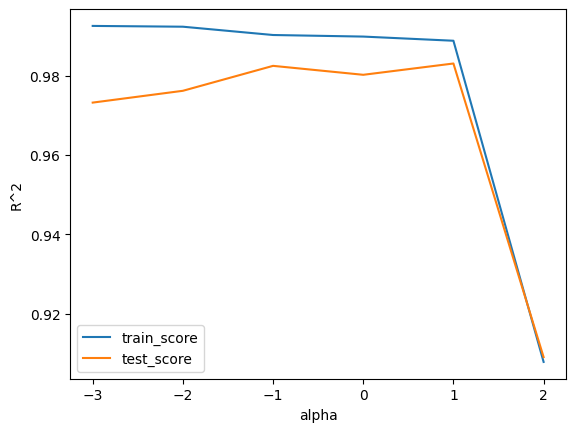

In [25]:
alpha = [0.001, 0.01, 0.1, 1, 10, 100]

train_score = []
test_score = []

for i in alpha:
  lasso = Lasso(alpha = i, max_iter = 10000)
  lasso.fit(train_scaled, train_target)
  train_score.append(lasso.score(train_scaled, train_target))
  test_score.append(lasso.score(test_scaled, test_target))

plt.plot(np.log10(alpha), train_score, label = 'train_score')
plt.plot(np.log10(alpha), test_score, label = 'test_score')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.legend()

plt.show()

위 결과를 통해서
$$ log_{10} \,alpha = 1$$에서 최적의 alpha값을 가지는 것을 알 수 있다.

## 라쏘 회귀의 max_iter

---

라쏘 모델을 훈련할 때 ConvergemceWarning이라는 경고가 발생할 수 있다. 사이킷런의 라쏘 모델은 최적의 계수를 찾기 위해 반복적인 계산을 수행하는데, 지정한 반복 횟수가 부족할 때 이런 경고가 발생한다. 이 반복 횟수를 충분히 늘리기 위해 max_iter 매개변수의 값을 10000으로 지정하였다.

필요하면 더 늘릴 수 있지만 이 문제에서는 큰 영향을 끼치지 않는다.

## 적합한 alpha 적용

---

적절한 alpha 값을 적용하고 계수를 줄이거나 0으로 만들기도 하는 라쏘의 특성 또한 확인해볼 수 있다.

In [30]:
lasso = Lasso(alpha = 10, max_iter = 10000)
lasso.fit(train_scaled, train_target)

print(lasso.score(train_scaled, train_target), lasso.score(test_scaled, test_target))


# 특성의 계수를 0으로 만든 갯수 확인하기

print(np.sum(lasso.coef_ == 0))


0.9887624603020236 0.9830309645308443
48


위 결과를 통해서 55개의 특성중에서 무려 48개의 계수를 0으로 만들면서 과대적합과 과소적합에 대한 문제를 해결하는 모델을 만든 것을 알 수 있다.

# 고찰

---

이번에는 하나의 특성을 제곱하거나 변형해서 사용하는 것이 아닌 여러개의 특성을 적용하면서도 거듭제곱을 이용해서 학습시켰다.

우선 기존의 특성으로 길이만을 사용했던 것과는 다르게 pandas를 이용해서 csv파일을 불러오고 to_numpy()로 변환하였다.

이후에 numpy array로 되어있는 데이터를 sklearn.preprocessing 패키지에 있는 PolynomialFeatures 클래스를 통해서 특성끼리 제곱하거나 거듭 제곱을 할 수 있었다.
클래스를 만들 때 include_bias = False를 통해서 절편을 위한 특성을 제거 할 수 있었고 degree를 설정함으로 인해서 최고 차수를 정했다.

그렇게 많아진 특성에 비해서 데이터가 부족하다면 과대적합이 나타날 수 있다는 사실을 알게 되었고

각각 릿지회귀(Ridge regression)과 라쏘회귀(Lasso regression)의 규제를 통해서 과대적합을 해결할 수 있었고 각각 alpha값을 조정하면서 최적의 결과를 도출해낼 수 있었다.

